In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
mpl.rc_file('tjy.mplstyle')

## Import Qualtrics CSV

In [5]:
from pathlib import Path
p = Path('C:/Users/takas/OneDrive/Desktop/2025 GA Financial Census_May 15, 2025_21.34.csv')
df = pd.read_csv(p,header=1)

## Clean Qualtrics CSV

In [28]:
df1 = df.drop([0])

# No previews
df1 = df1[df1['Response Type']!='Survey Preview'].reset_index(drop=True)

# Discard unnecessary data
df1 = df1.iloc[:,17:]

# Print data summary
print('Data read into df1.\n{} responses.\n{} questions asked.'.format(*df1.shape))

Data read into df1.
362 responses.
54 questions asked.


## Background

In [48]:
df_bg = df1.iloc[:,:6]
clabs = df_bg.columns.to_list()
print('Background data read into df_bg.\n{} questions in this section:'.format(df_bg.shape[1]))
print(*['\t{}. {}\n'.format(ind+1, i) for ind, i in enumerate(clabs)])

print_fil = lambda x: print('\t'+str([i for i in x[x.notna()]]))

div_other = df_bg.pop(clabs[1])
print('Other divisions (Q2):')
if div_other.count() > 0: 
    print_fil(div_other)
else: 
    print('\tNone')

dpt_other = df_bg.pop(clabs[3])
print('Other departments (Q4):')
if dpt_other.count() > 0:
    print_fil(dpt_other)
else: 
    print('\tNone')

dpt_speci = df_bg.pop(clabs[4])
print('Specified departments (Q5):')
if dpt_speci.count() > 0:
    print_fil(dpt_speci)
else: 
    print('\tNone')

Background data read into df_bg.
6 questions in this section:
	1. What division is your program in? - Selected Choice
 	2. What division is your program in? - Other (please specify) - Text
 	3. Which department are you in? - Selected Choice
 	4. Which department are you in? - Other (please specify) - Text
 	5. Please specify which department you are in
 	6. What is your degree program?

Other divisions (Q2):
	['Quantitative bio sciences', 'Biophysics', 'QB3']
Other departments (Q4):
	None
Specified departments (Q5):
	None


['School of Information' 'College of Chemistry' 'School of Public Health'
 'Letters and Science - Mathematical and Physical Sciences'
 'School of Law' 'Letters and Science - Arts and Humanities'
 'School of Optometry' 'College of Engineering'
 'College of Environmental Design' 'School of Social Welfare'
 'Goldman School of Public Policy'
 'Letters and Science - Biological Sciences'
 'Berkeley School of Education' 'Letters and Science - Social Sciences'
 'Haas School of Business' 'Rausser College of Natural Resources'
 'Other (please specify)'
 'College of Computing, Data Science, and Society']


<BarContainer object of 1 artists>

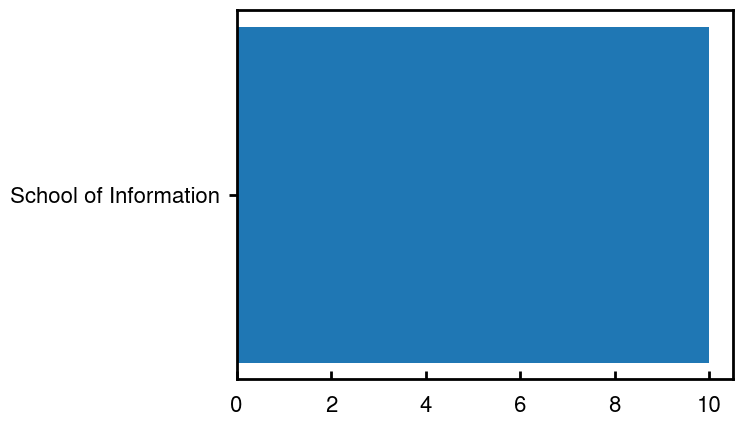

In [54]:
# Division
div_data = df_bg[clabs[0]]
div_list = div_data[div_data.notna()].unique()
print(div_list)
counts = [div_data[div_data==div_list[i]].count() for i in range(len(div_list))]
# plt.barh(div_list, counts)
plt.barh(div_list[0], counts[0])
         